In [1]:
import IPython
import matplotlib
import h5py
import numpy as np
import numpy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import pytdi.michelson
from pytdi import Data
import scipy
from matplotlib import rc
import psd
import os
from datetime import datetime
import lisaorbits

In [2]:
!pwd

/home/lisauser/notebooks


In [131]:
# Define glitch signal parameters
# Initial start time
t0 = 0.0

# Duration of the glitch
t_dur = 1e3

# Sampling frequency of the file
Fs = 16.0

# Time step 
dt = 1.0/Fs

# Time of injection
t_inj = 500

# Number of elements (size of the file)
size = int(Fs*t_dur)

# Magnitude of the step size 
magnitude = 1e-5

# Injection onto spacecraft body X-axis and Phi-axis
params    = ['sc_1_X','sc_1_Phi'] 

# Simulation time duration
sim_tdur = 1e3

In [120]:
# Iterate through the specified injection parameters (in this case we're only injecting
# along the X-axis of the spacecraft and the Phi-axis)
for i, param in enumerate(params):    
    # Write the input glitch files using the parameters specified in the code block before
    with h5py.File(f"inputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","w") as f:
        # Initialize the time vector for the input glitch file
        t = np.arange(0, t_dur, dt)
        # Initialize the f(t) vector (this is a function of the time vector)
        step = np.zeros_like(t)
        # The function of the time vector specified above is just a rectangular step function
        # meaning it will rise to the specified magnitude and stay at that value until the 
        # end of the duration specified in the time vector
        step[t>=t_inj] = magnitude
        # Create the time vector as a dataset in the input .h5 file
        f.create_dataset("t", data=t)
        # Create the f(t) vector as a dataset in the input .h5 file (dependent on what axis we're injecting on)
        f.create_dataset(f'{param}', data=step)
        # Specify the attributes of this file (includes sampling frequency, initial start time, and size of the file...
        # possibly more attributes we can choose from but currently not necessary)
        f.attrs["fs"]   = Fs
        f.attrs["t0"]   = t0
        f.attrs["size"] = size

In [102]:
orbits = lisaorbits.KeplerianOrbits(dt=dt, size=int(sim_tdur*Fs), t0=datetime.fromtimestamp(0))
orbits.write(f"kepler-orbits-{sim_tdur*Fs}.h5")

In [103]:
orbit_file = f"kepler-orbits-{sim_tdur*Fs}.h5"

In [ ]:
sc_vec     = ['1', '2', '3']     # spacecraft number
dimensions = ['x', 'y', 'z']     # spacecraft axes
dyn        = ['x', 'v', 'a']     # position, velocity, acceleration

dynamics = {}                    # construct dictionary to store all values

# simple for loop to place sc dynamics vectors into dictionary
for i, dyn in enumerate(dyn):
    for j, scvec in enumerate(sc_vec):
        for k, dim in enumerate(dimensions):
            with h5py.File(f"kepler-orbits-{5e4*Fs}.h5","r") as f:
                # barycentric coordinate time
                # in km
                dynamics[f'{scvec}_{dim}_{dyn}'] = f[f'/tcb/{dyn}'][:, j, k]           

--lasernoise-on-off=0 --accelnoise-on-off=0 --omsnoise-on-off=0 --obpathlengthnoise-on-off=0 --telescopenoise-on-off=0 --backlinknoise-on-off=0 --usonoise-on-off=0 --modulationnoise-on-off=0 --dwsnoise-on-off=0 --rangingnoise-on-off=0 --sc-jitter-phi-on-off=0 --sc-jitter-eta-on-off=0 --sc-jitter-theta-on-off=0 --mosa-jitter-phi-on-off=0 --mosa-jitter-eta-on-off=0

In [104]:
# Generate standard LISANode simulation
!lisanode run --build lisanode.lisa:LISA -d {sim_tdur} --orbit-path=orbit_file 

Analyzing 'LISA'...
Saving cpp file to './LISA.cpp'...
Building simulation to './LISA'...
g++: fatal error: Killed signal terminated program cc1plus
compilation terminated.
Traceback (most recent call last):
  File "/usr/local/bin/lisanode", line 33, in <module>
    sys.exit(load_entry_point('lisanode', 'console_scripts', 'lisanode')())
  File "/codes/LISANode/lisanode/commands.py", line 329, in main
    args.subcommand(args)
  File "/codes/LISANode/lisanode/commands.py", line 231, in run
    build(cpp_path, ex_path, args.flags, args)
  File "/codes/LISANode/lisanode/commands.py", line 279, in build
    subprocess.run(commands, shell=True, stderr=subprocess.STDOUT, check=True)
  File "/usr/lib/python3.9/subprocess.py", line 528, in run
    raise CalledProcessError(retcode, process.args,
subprocess.CalledProcessError: Command 'h5c++ './LISA.cpp'  -std=c++17 -O0 -o './LISA' -isystem '/opt/homebrew/Cellar/boost/1.78.0_1/include/' -iquote '/codes/LISANode/lisanode/toolbox/nodes/' -iquote '

In [121]:
glitch_file = []; output_file = [];
for i, param in enumerate(params):
    glitch_file.append(f"inputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5")
    output_file.append(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5")

In [122]:
# Generate standard LISANode simulation
for i, name in enumerate(glitch_file):
    !./LISA --duration={sim_tdur} --orbit-path={orbit_file} --glitch-file={name} --output={output_file[i]}

Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
Using orbit file version 2.0
HDF5-DIAG: Error detected in HDF5 (1.10.6) thread 139669363255104:
  #000: ../../../src/H5D.c line 298 in H5Dopen2(): unable to open dataset
    major: Dataset
    minor: Can't open object
  #001: ../../../src/H5Dint.c line 1410 in H5D__open_name(): not found
    major: Dataset
    minor: Object not found
  #002: ../../../src/H5Gloc.c line 422 in H5G_loc_find(): can't find object
    major: Symbol table
    minor: Object not found
  #003: ../../../src/H5Gtraverse.c line 851 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #004: ../../../src/H5Gtraverse.c line 627 in H5G__traverse_real(): traversal operator failed
    major: Symbol table
    minor: Callback failed
  #005: ../.

In [137]:
with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
    print(f.keys())


<KeysViewHDF5 ['X', 'Y', 'Z', 'isi_c_12', 'isi_c_13', 'isi_c_21', 'isi_c_23', 'isi_c_31', 'isi_c_32', 'isi_c_fluctuations_12', 'isi_c_fluctuations_13', 'isi_c_fluctuations_21', 'isi_c_fluctuations_23', 'isi_c_fluctuations_31', 'isi_c_fluctuations_32', 'isi_c_offsets_12', 'isi_c_offsets_13', 'isi_c_offsets_21', 'isi_c_offsets_23', 'isi_c_offsets_31', 'isi_c_offsets_32', 'isi_dws_eta_12', 'isi_dws_eta_13', 'isi_dws_eta_21', 'isi_dws_eta_23', 'isi_dws_eta_31', 'isi_dws_eta_32', 'isi_dws_phi_12', 'isi_dws_phi_13', 'isi_dws_phi_21', 'isi_dws_phi_23', 'isi_dws_phi_31', 'isi_dws_phi_32', 'isi_sb_12', 'isi_sb_13', 'isi_sb_21', 'isi_sb_23', 'isi_sb_31', 'isi_sb_32', 'isi_sb_fluctuations_12', 'isi_sb_fluctuations_13', 'isi_sb_fluctuations_21', 'isi_sb_fluctuations_23', 'isi_sb_fluctuations_31', 'isi_sb_fluctuations_32', 'isi_sb_offsets_12', 'isi_sb_offsets_13', 'isi_sb_offsets_21', 'isi_sb_offsets_23', 'isi_sb_offsets_31', 'isi_sb_offsets_32', 'mpr_12', 'mpr_13', 'mpr_21', 'mpr_23', 'mpr_31', 'm

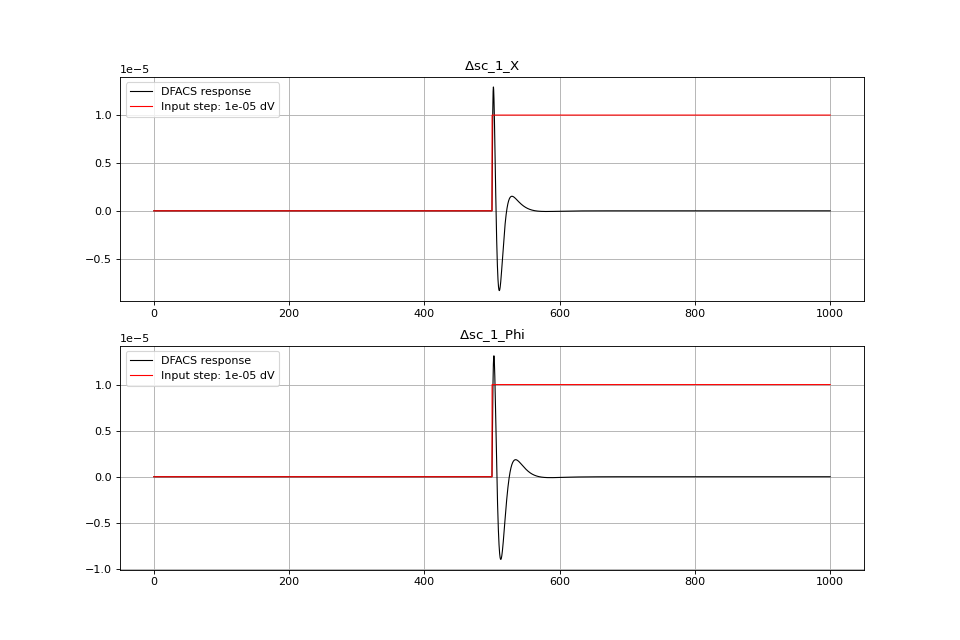

In [133]:
# This command is needed in order to display the plot
%matplotlib widget
# Initialize figure object for plot 
fig = plt.figure(figsize=(12,8),dpi=80,facecolor=(1,1,1))
# Ensure text on plot does not overlap with other text for clean look
plt.tight_layout()
# Specify the colors for the magnitudes injected (here we are simply testing one magnitude so
# the plots will only have a black line)
colors = ['black','red']

output_params = ['sc_1_X','sc_1_Phi']
# Iterate through the specified injection parameters (axes of desire, currently just spacecraft
# body X-axis and Phi-axis)
for i, param in enumerate(params):
    # Read the files that were created in the code block before    
    with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
        y1 = f[output_params[i]][:]
        t1 = np.arange(0, sim_tdur, 1/Fs)
    with h5py.File(f"inputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
        y2 = f[param][:] + (10**-9)
        t2 = f['t'][:]
        # Create axis object for each parameter 
        ax = plt.subplot(len(params),1,i+1)
        
        ax.plot(t1, y1, color=colors[0], ls="-", label=f'DFACS response', linewidth=1)
        ax.plot(t2, y2, color=colors[1], ls="-", label=f'Input step: {magnitude} dV', linewidth=1)
        # Gridded plot
        plt.grid()
        plt.legend()
        plt.title(rf'$\Delta${params[i]}')
        # Set x-axis limit to time vector minimum and maximum values
        # ax.set_xlim([400, 600])
        

In [124]:
for i, param in enumerate(params):
    data = Data.from_lisanode(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5")
    X2   = pytdi.michelson.X2.build(**data.args)(data.measurements)
    Y2   = pytdi.michelson.Y2.build(**data.args)(data.measurements)
    Z2   = pytdi.michelson.Z2.build(**data.args)(data.measurements)
    with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5", "r+") as lisa:
        lisa.create_dataset("X", data=X2)
        lisa.create_dataset("Y", data=Y2)
        lisa.create_dataset("Z", data=Z2)

You are using a LISANode file in a development version
You are using a LISANode file in a development version


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'outputGlitch-1000.0_X_1e-05.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

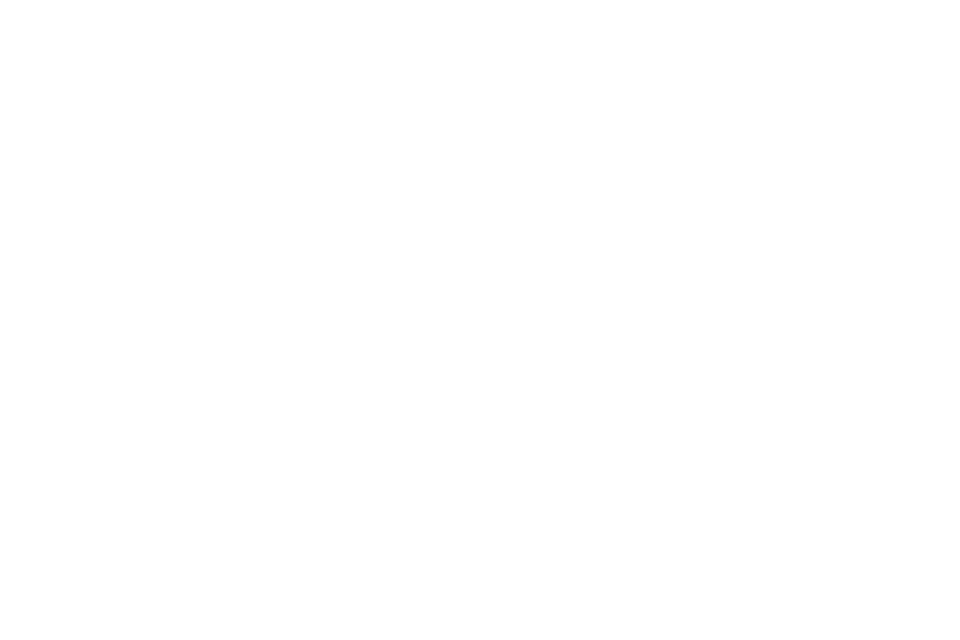

In [129]:
# This command is needed in order to display the plot
%matplotlib widget
# Initialize figure object for plot 
fig = plt.figure(figsize=(12,8),dpi=80,facecolor=(1,1,1))
# Ensure text on plot does not overlap with other text for clean look
plt.tight_layout()
# Specify the colors for the magnitudes injected (here we are simply testing one magnitude so
# the plots will only have a black line)
colors = ['black','red']
param = ['X','Phi']
output_params = ['X','Y']
# Iterate through the specified injection parameters (axes of desire, currently just spacecraft
# body X-axis and Phi-axis)
for i, param in enumerate(params):
    # Read the files that were created in the code block before    
    with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
        y1 = f[output_params[i]][:]
        t1 = np.arange(0, sim_tdur, 4/Fs)
        ax = plt.subplot(1,2,i+1)
        
        ax.plot(t1, y1, color=colors[1], ls="-", label=f'TDI response', linewidth=1)
        # Gridded plot
        plt.grid()
        plt.legend()
        plt.title(f'TDI-{output_params[i]}')
        # Set x-axis limit to time vector minimum and maximum values
        # ax.set_xlim([400, 600])
        #ax.set_ylim([-1e-1, 1e-1])
        f.keys()

In [ ]:
print(lisa_output_TDI.shape[2])
with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
    print(f[TDIparam][:].shape)
    print(f[output_param][:int(size/2)].shape)

In [125]:
sp = scipy.signal

output_TDI_params = ['X','Y','Z']
output_params   = ['sc_1_X','sc_1_Phi']
params    = ['sc_1_X','sc_1_Phi'] 

cf = .1
fs = 16
fs_TDI = 4
order = 2
NFFT = 500
cut = 1000
end = int(size/4 - cut)

# Initializing all the arrays
lisa_output         = np.zeros([len(output_params), len(output_TDI_params), int(size/2)])
lisa_output_d       = np.zeros([len(output_params), len(output_TDI_params), int(size/8)])
lisa_output_TDI     = np.zeros([len(output_params), len(output_TDI_params), int(size/4)])
lisa_output_TDI_PSD = np.zeros([len(output_params), len(output_TDI_params), int(NFFT/2+1)])

b, a  = sp.iirfilter(order, Wn=cf, fs=fs, btype='low',ftype='butter')
d, c  = sp.iirfilter(order, Wn=cf, fs=fs_TDI, btype='low',ftype='butter')

for j, param in enumerate(params):
    with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
        for i, output_param in enumerate(output_params):

            lisa_output[j, i, :]   = f[output_param][:int(size/2)]
            lisa_output_d[j, i, :] =  sp.decimate(sp.filtfilt(b, a, lisa_output[j, i, :]), 4)

for j, param in enumerate(params):
    for i, TDIparam in enumerate(output_TDI_params):
        with h5py.File(f"outputGlitch-{str(t_dur)}_{param}_{str(magnitude)}.h5","r") as f:
        
            lisa_output_TDI[j, i, :] = f[TDIparam][:]

            lisa_output_TDI[j, i, :] = sp.filtfilt(d, c, lisa_output_TDI[j, i, :])

            f, lisa_output_TDI_PSD[j, i, :] = sp.welch(lisa_output_TDI[j, i, :], fs=fs_TDI, window='hanning', nperseg=NFFT, noverlap=NFFT//2)

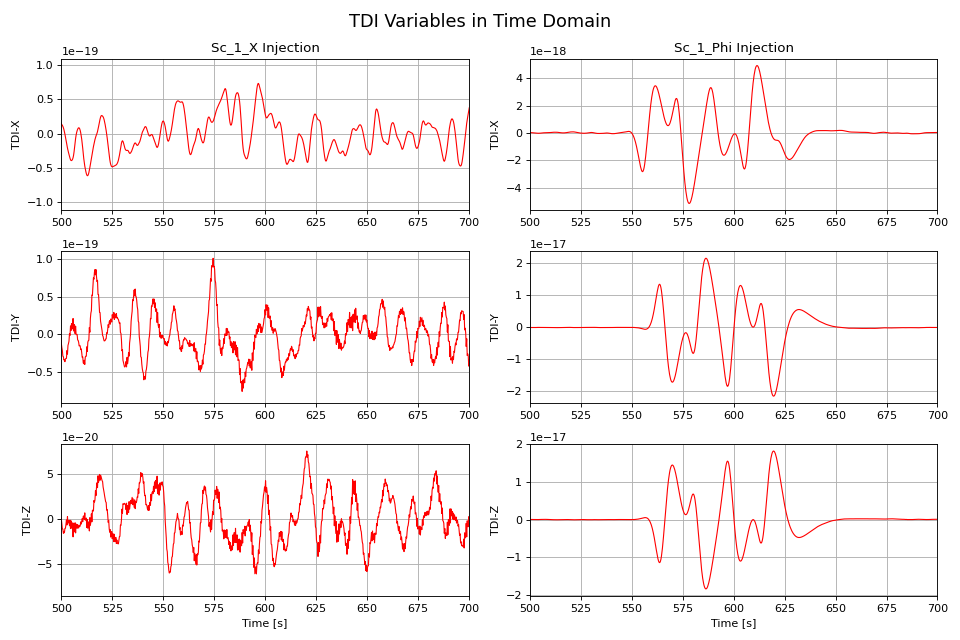

In [128]:
# Initialize figure object for plot
fig, axes = plt.subplots(len(output_TDI_params), len(params), figsize=(12, 8), dpi=80, facecolor=(1, 1, 1))
# Ensure text on plot does not overlap with other text for a clean look
plt.tight_layout()
# Specify the colors for the magnitudes injected (here we are simply testing one magnitude so
# the plots will only have a black line)
colors = ['black', 'red']
params = ['X', 'Phi']
output_TDI_params = ['X', 'Y', 'Z']
laserfreq = 2.816E14
t = np.arange(0, sim_tdur, 4/Fs)
fig.suptitle('TDI Variables in Time Domain', fontsize=16)

for j, param_j in enumerate(params):
    for i, param_i in enumerate(output_TDI_params):
        ax = axes[i, j]  # Get the current subplot
        data = lisa_output_TDI[j, i, cut:end] / laserfreq
        ax.plot(t[cut:end], data, color=colors[1], ls="-", label=f'TDI response', linewidth=1)

        if i == 0:
            ax.set_title(f'Sc_1_{param_j} Injection')
        elif i == 2:
            ax.set_xlabel('Time [s]')

        # if (i == 0 or i == 1) and j == 0:
        #     ax.set_ylim([-5e-15, 5e-15])
        # elif (i == 0 or i == 1) and j == 0:
        #     ax.set_ylim([-3e-14, 3e-14])
        # elif (i == 0 or i == 1) and j == 1:
        #     ax.set_ylim([-3e-15, 3e-15])

        # Gridded plot
        ax.grid()
        ax.set_ylabel(f'TDI-{output_TDI_params[i]}')
        # Set x-axis and y-axis limits
        ax.set_xlim([500, 700])
        

plt.tight_layout()
#plt.savefig("TDI_time_domain_injection.png")  # Save the static plot as an image
plt.show()
